# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
import numpy.linalg as la
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


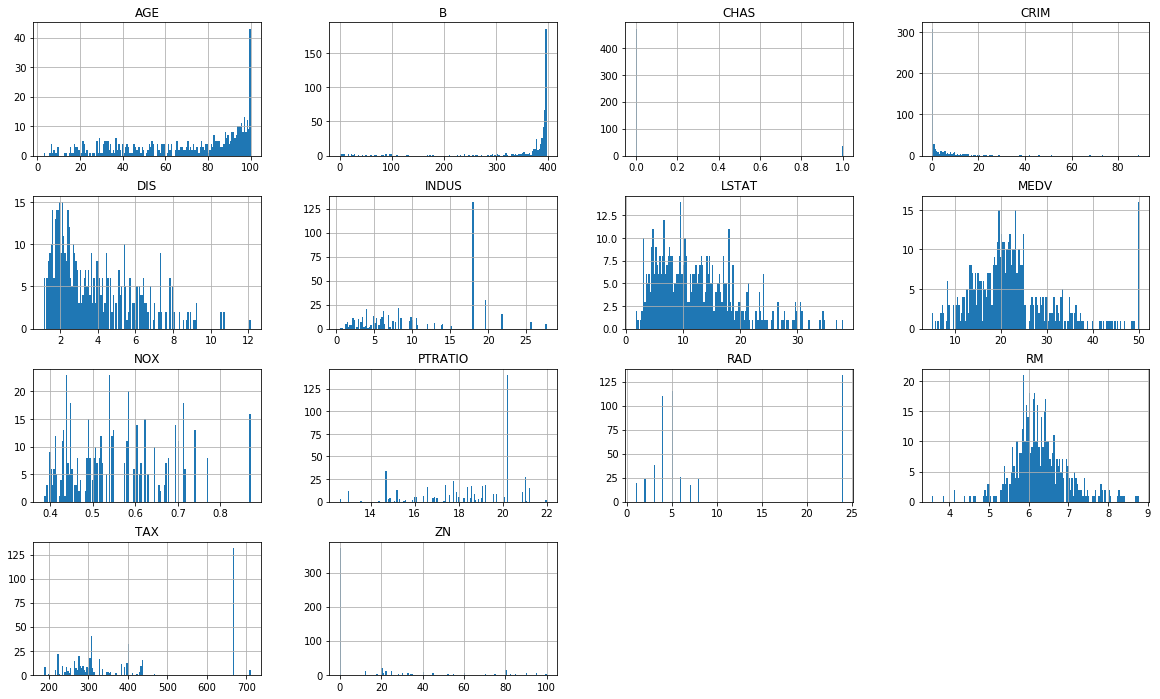

In [4]:
data.hist(figsize=(20,12),bins=150)
plt.show()

* CRIM: Логнормальное
* CHAS: Бернулли
* RM: Нормальное
* DIS: Гамма
* RAD: Биномиальное
* B: Логнормальное
* LSTAT: Хи-квадрат
* MEDV: Нормальное (?)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [5]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


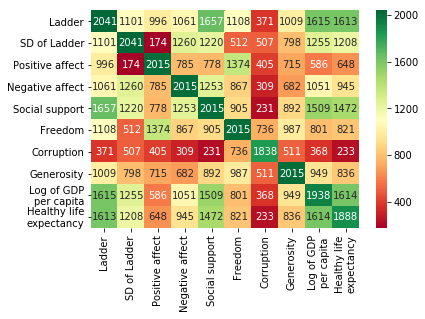

In [6]:
sns.heatmap(df.cov(), annot=True, fmt='.0f', cmap='RdYlGn')
plt.show()

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Отсутствующие значения в колонках: Positive affect (1), Negative affect (1), Social support (1), Freedom (1), Corruption (8), Generosity (1), Log of GDP per capita (4), Healthy life expectancy (6).

In [8]:
df.dropna(inplace=True, subset=['Country (region)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.6+ KB


Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [11]:
len(df['Country (region)'].value_counts())

156

Скорее всего, это проблема кластеризации.

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

(без dropna код выдает ошибку)

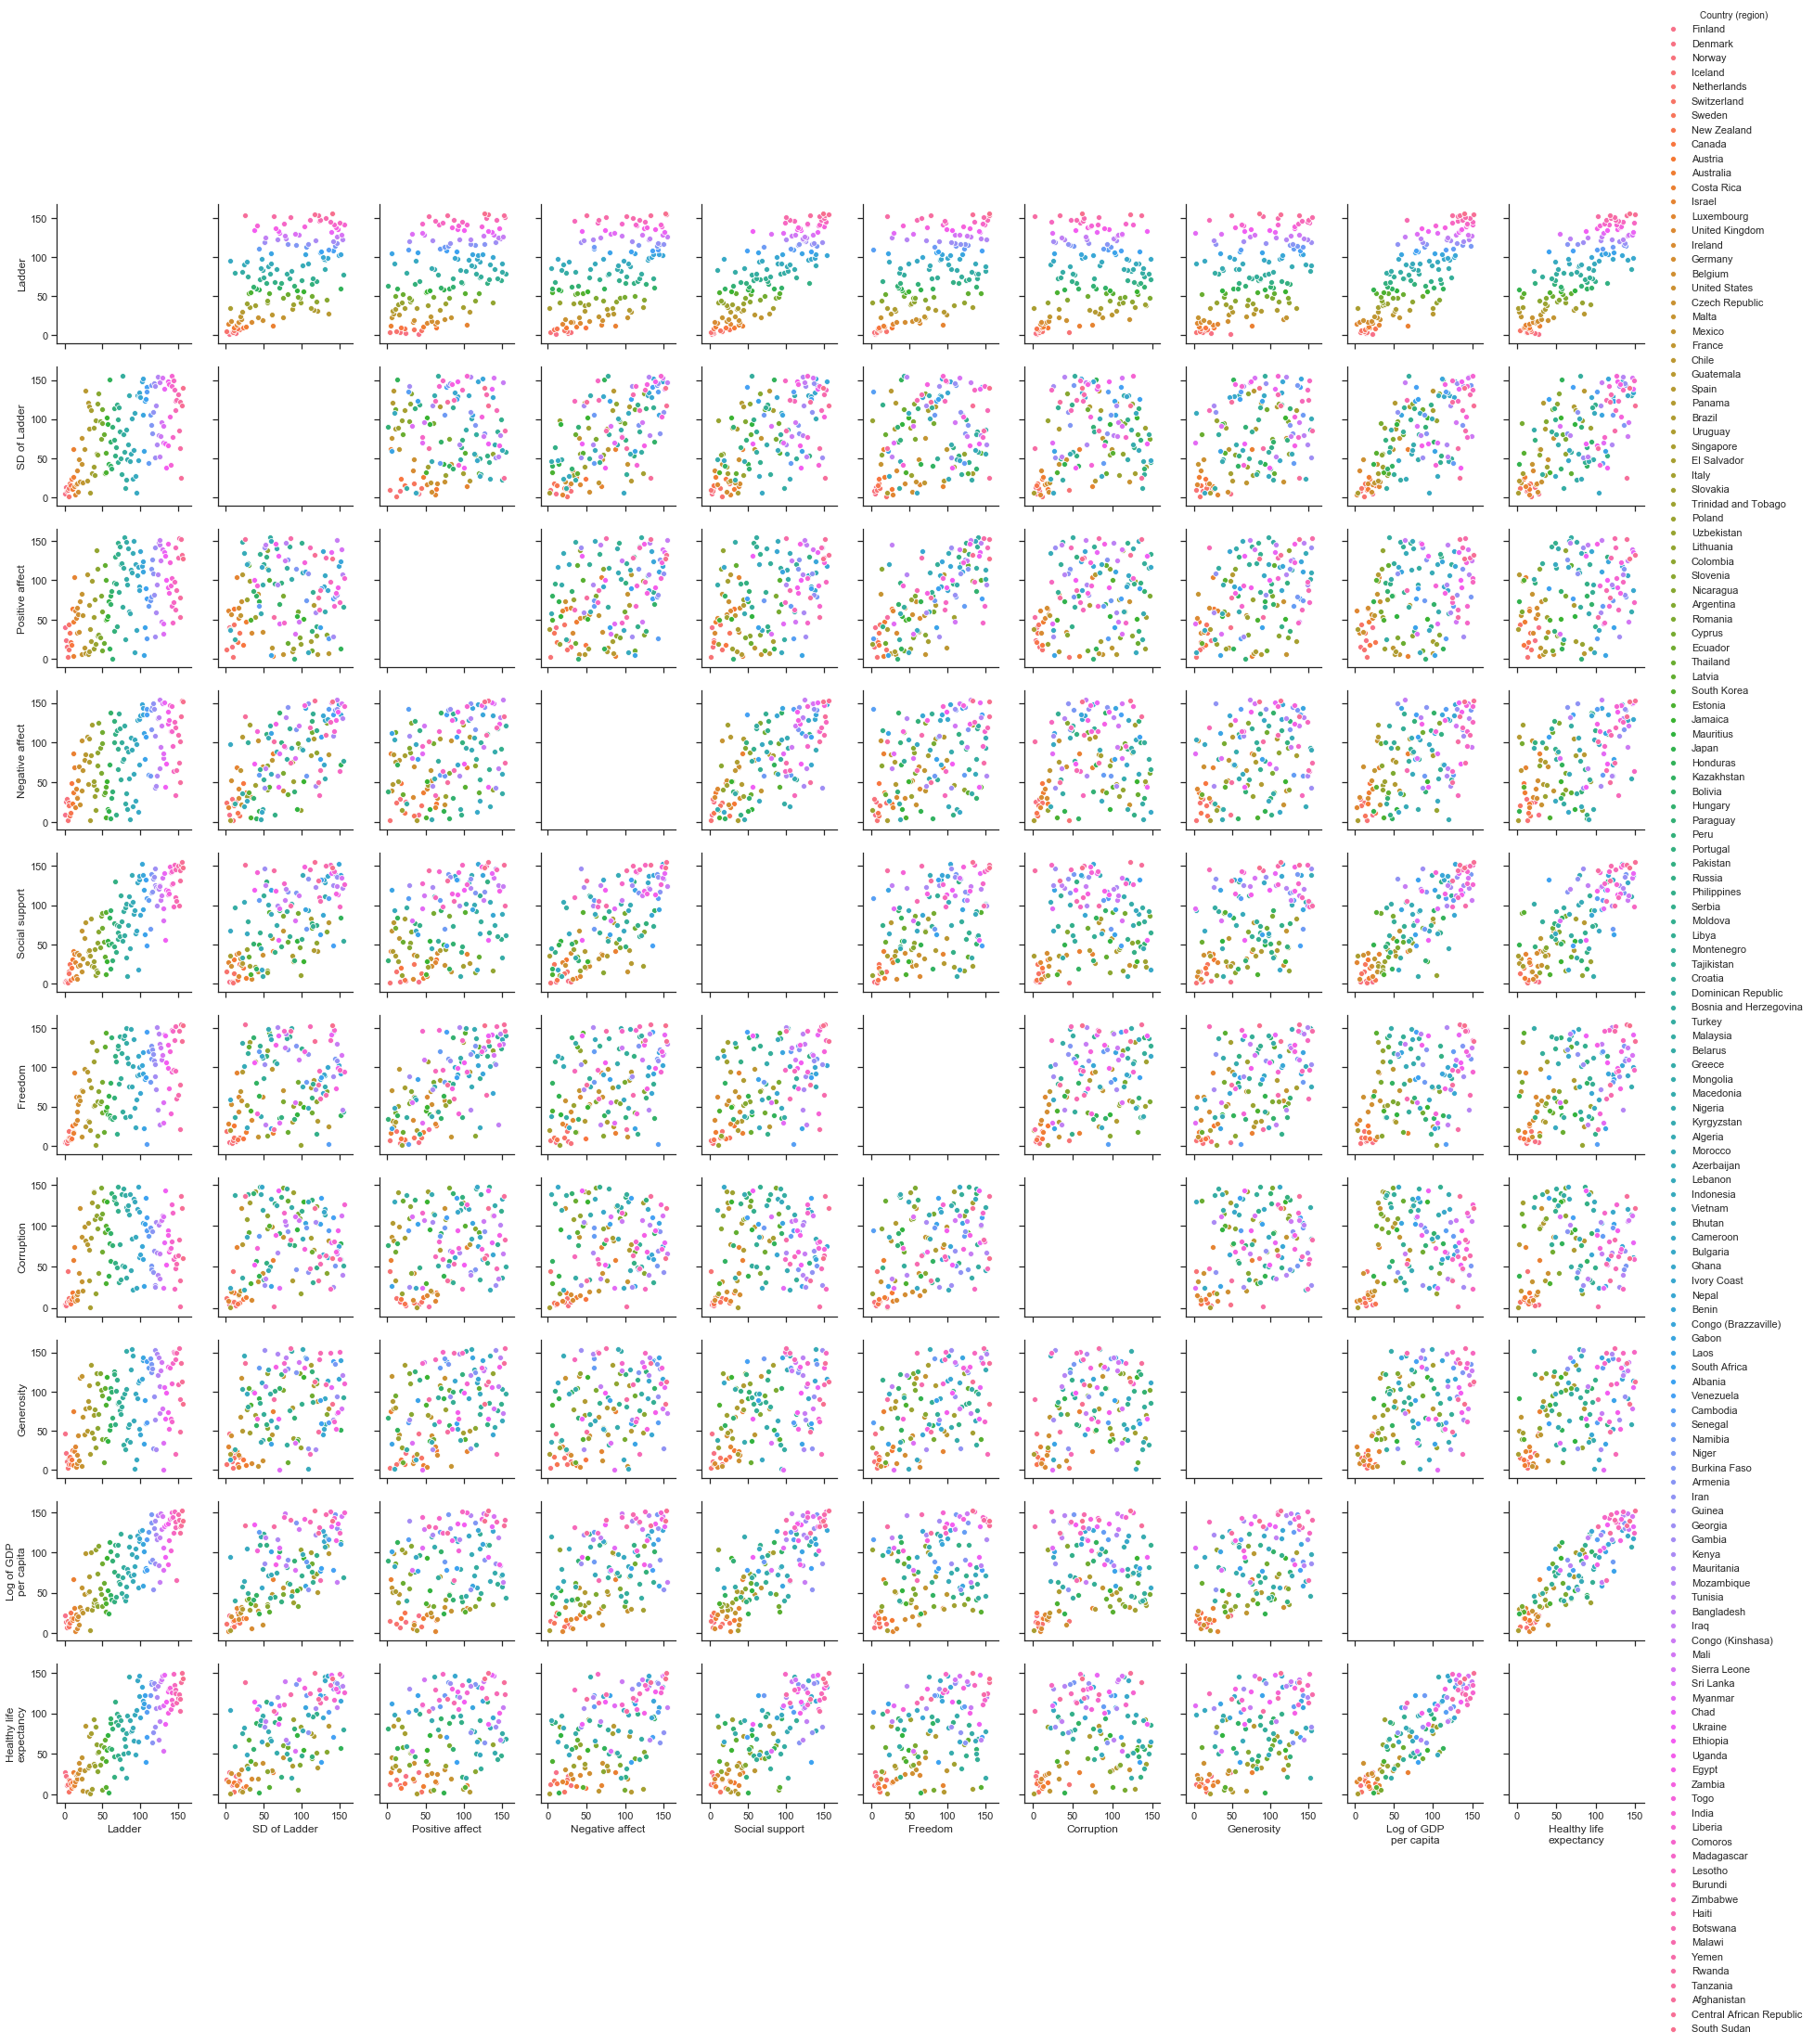

In [12]:
# Если код ниже не работает, измените код, используя материал лекций.
# Пишите на почту, если испытываете проблемы: yustiks@gmail.com
df1=df.dropna()
np.seterr(invalid='ignore')
sns.set(style="ticks", color_codes=True)
sns.pairplot(df1, hue='Country (region)')
plt.show()

По большинству параметров похожи страны, которые имеют в легенде близкие цвета. Один из самых плотных кластеров - страны: Финляндия, Дания, Норвегия, Исландия, Нидерланды, Швейцария, Швеция, Новая Зеландия, Канада, Австрия. 

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

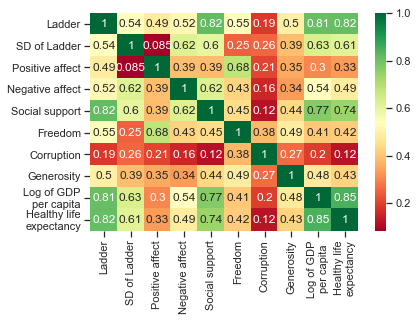

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

Самые коррелирующие параметры: Healthy life expectancy и Log of GDP per capita (0,87), Ladder и Healthy life expectancy (0,83), Ladder и Social support (0,83), Ladder и Log of GDP per capita (0,82).

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

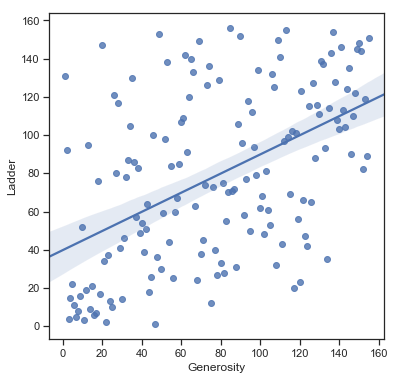

In [14]:
df2=df.dropna(subset=['Generosity','Ladder'])
plt.figure(figsize=(6, 6))
sns.regplot(x='Generosity', y='Ladder', data=df);

В данном случае, прямая - не будет собственным вектором, т.к. при проецировании данных на эту прямую разброс не будет максимальным. Наиболее вероятным собственным вектором будет прямая близкая к y=x.

In [15]:
mat=np.array([(df2['Generosity']-df2['Generosity'].mean())/df2['Generosity'].std(),
              (df2['Ladder']-df2['Ladder'].mean())/df2['Ladder'].std()])
A = np.cov(mat)
w, v = np.linalg.eig(A)
w,v

(array([0.50214413, 1.49785587]), array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

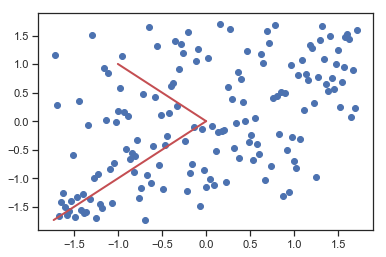

In [16]:
plt.scatter(x=np.array(mat[0]),y=np.array(mat[1]))
for w_, v_ in zip(w, v.T):
    plt.plot([0, 2*np.sqrt(w_)*v_[0]], [0, 2*np.sqrt(w_)*v_[1]], 'r-', lw=2)

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

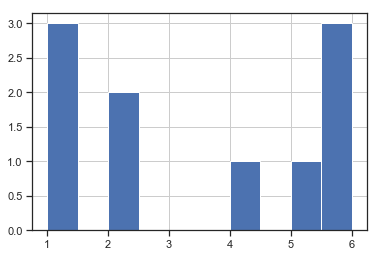

In [17]:
n=10
a=pd.Series()
for i in range(n): a.loc[i]=np.random.randint(1,7)
a.hist()
plt.show()

Биномиальное распределение

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

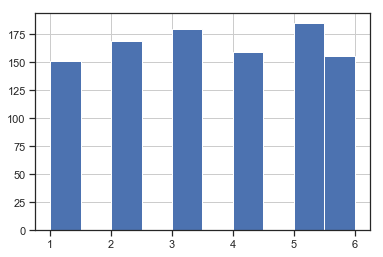

In [18]:
n=1000
a=pd.Series()
for i in range(n): a.loc[i]=np.random.randint(1,7)
a.hist()
plt.show()

Равномерное распределение. Кубик честный, значит вероятность выпадания каждой стороны равновероятна.

Чтобы применить центральную предельную теорему, нужно брать больше кубиков. Таким образом за каждый раз подбрасывания будет выпадать число от 1 * c до 6 * c, где c - количество кубиков.

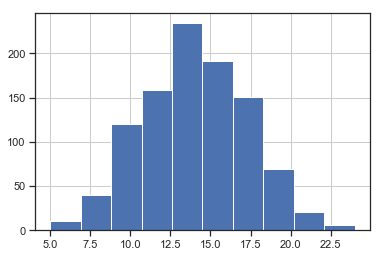

In [19]:
n=1000
c=4
a=pd.Series()
for i in range(n):
    a.loc[i]=np.random.randint(1,7)
    for j in range(2,c+1): a.loc[i]+=np.random.randint(1,7)
a.hist()
plt.show()